In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Q1. Dataset Preparation

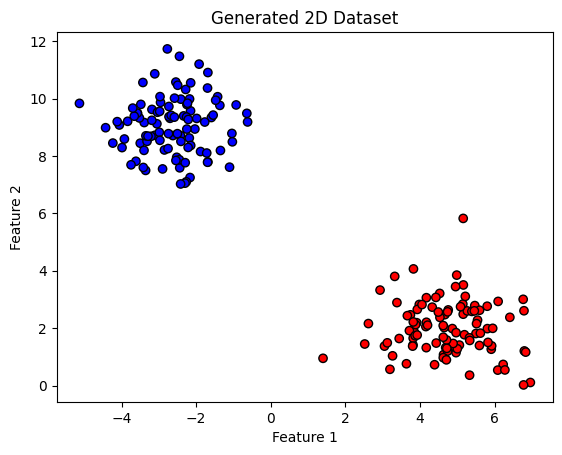

In [71]:
X, y = make_blobs(n_samples=200, centers=2, random_state=42, n_features=2)

y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2D Dataset')
plt.show()


#Q2. Perceptron Implementation

In [72]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=10):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.where(linear_output >= 0, 1, -1)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

# Train
perceptron = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron.fit(X, y)

print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)


Final Weights: [ 2.07106485 -1.37615797]
Final Bias: 0.0


#Q3. Decision Boundary

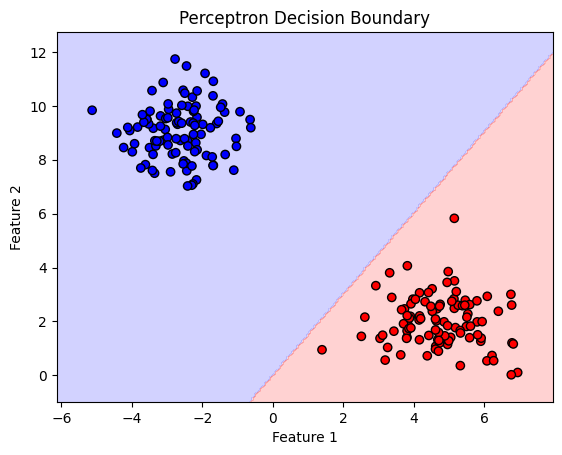

In [73]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, perceptron)

#Q4. Activation Function Implementation

In [74]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)


#Q5. Testing Activation Functions

In [75]:
inputs = np.array([-2, -1, 0, 1, 2])

print("Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax")
for val in inputs:
    sm = softmax(np.array([val, 0, 0]))[0]
    print(f"{val:5} | {sigmoid(val):.4f} | {tanh(val):.4f} | {relu(val):.4f} | {leaky_relu(val):.4f} | {sm:.4f}")


Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax
   -2 | 0.1192 | -0.9640 | 0.0000 | -0.0200 | 0.0634
   -1 | 0.2689 | -0.7616 | 0.0000 | -0.0100 | 0.1554
    0 | 0.5000 | 0.0000 | 0.0000 | 0.0000 | 0.3333
    1 | 0.7311 | 0.7616 | 1.0000 | 1.0000 | 0.5761
    2 | 0.8808 | 0.9640 | 2.0000 | 2.0000 | 0.7870


#Q6. Visualization of Activation Functions

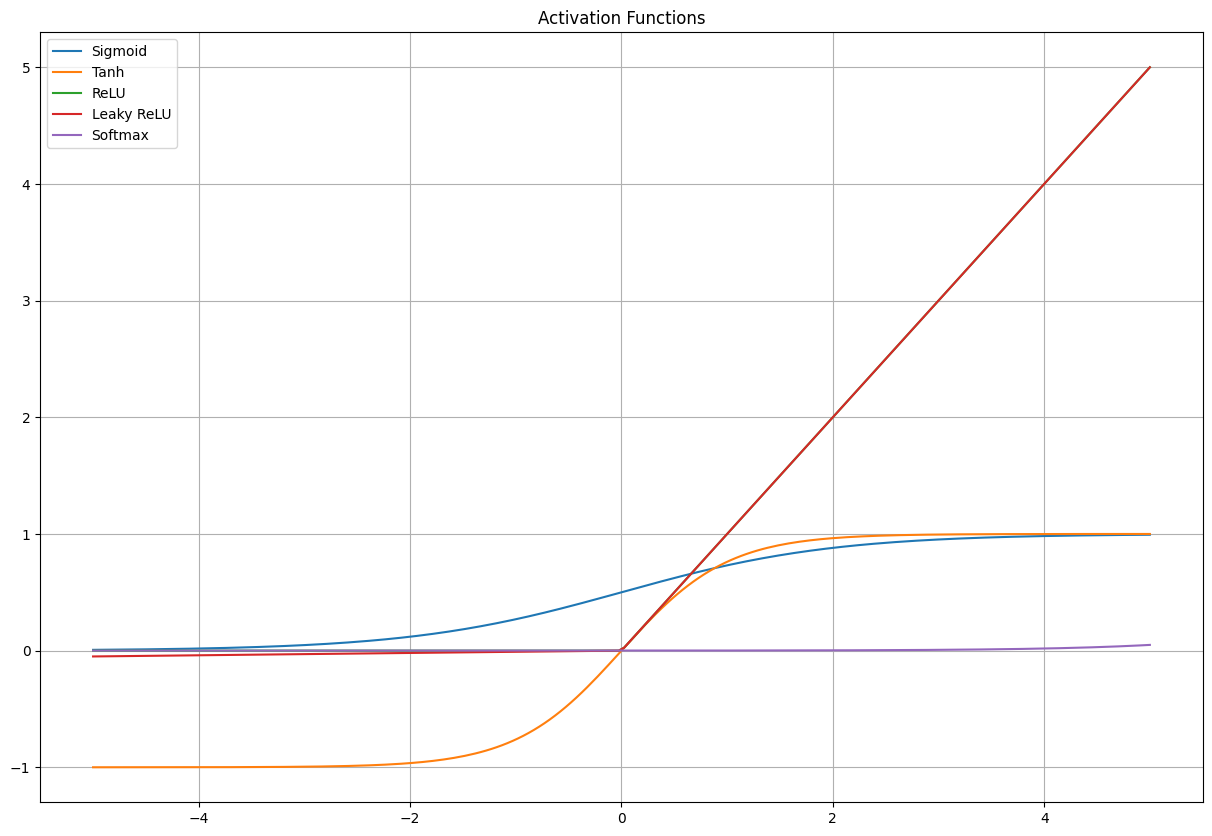

In [76]:
x_vals = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 10))

plt.plot(x_vals, sigmoid(x_vals), label="Sigmoid")
plt.plot(x_vals, tanh(x_vals), label="Tanh")
plt.plot(x_vals, relu(x_vals), label="ReLU")
plt.plot(x_vals, leaky_relu(x_vals), label="Leaky ReLU")
plt.plot(x_vals, softmax(x_vals), label="Softmax")

plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

The activation function you choose can greatly affect how well a neural network learns. In this case Sigmoid,Tanh, and softmax has slowed down training. ReLU helped keep learning active and make the network better at handling different kinds of problems..